<a href="https://colab.research.google.com/github/steven-77/Project/blob/main/lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
car=pd.read_csv('/content/fcar.csv')

In [11]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year_Name  875 non-null    object
 1   Price      875 non-null    object
 2   Kms        875 non-null    object
 3   Fuel       875 non-null    object
 4   Ownership  875 non-null    int64 
 5   Type       875 non-null    object
 6   Model      875 non-null    object
 7   Year       875 non-null    int64 
 8   Name       875 non-null    object
dtypes: int64(2), object(7)
memory usage: 61.6+ KB


In [9]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [10]:
car['Kms']=car['Kms'].str.split().str.get(0).str.replace(',','').astype(int)

In [11]:
car.describe(include='all')

,Year_Name,Price,Kms,Fuel,Ownership,Type,Model,Year,Name
count,875,8.750000e+02,875.000000,875,875.000000,875,875,875.000000,875
unique,146,NaN,NaN,3,NaN,2,257,NaN,24
top,2019 Tata NEXON,NaN,NaN,Petrol,NaN,Manual,LXI,NaN,Honda City
freq,32,NaN,NaN,644,NaN,646,26,NaN,111
mean,NaN,6.900407e+05,48231.418286,NaN,1.234286,NaN,NaN,5.321143,NaN
std,NaN,2.588681e+05,26932.282504,NaN,0.431817,NaN,NaN,2.579349,NaN
min,NaN,2.300000e+05,1024.000000,NaN,1.000000,NaN,NaN,0.000000,NaN
25%,NaN,5.145000e+05,26428.000000,NaN,1.000000,NaN,NaN,4.000000,NaN
50%,NaN,6.480000e+05,46305.000000,NaN,1.000000,NaN,NaN,5.000000,NaN
75%,NaN,8.540000e+05,67377.000000,NaN,1.000000,NaN,NaN,7.000000,NaN


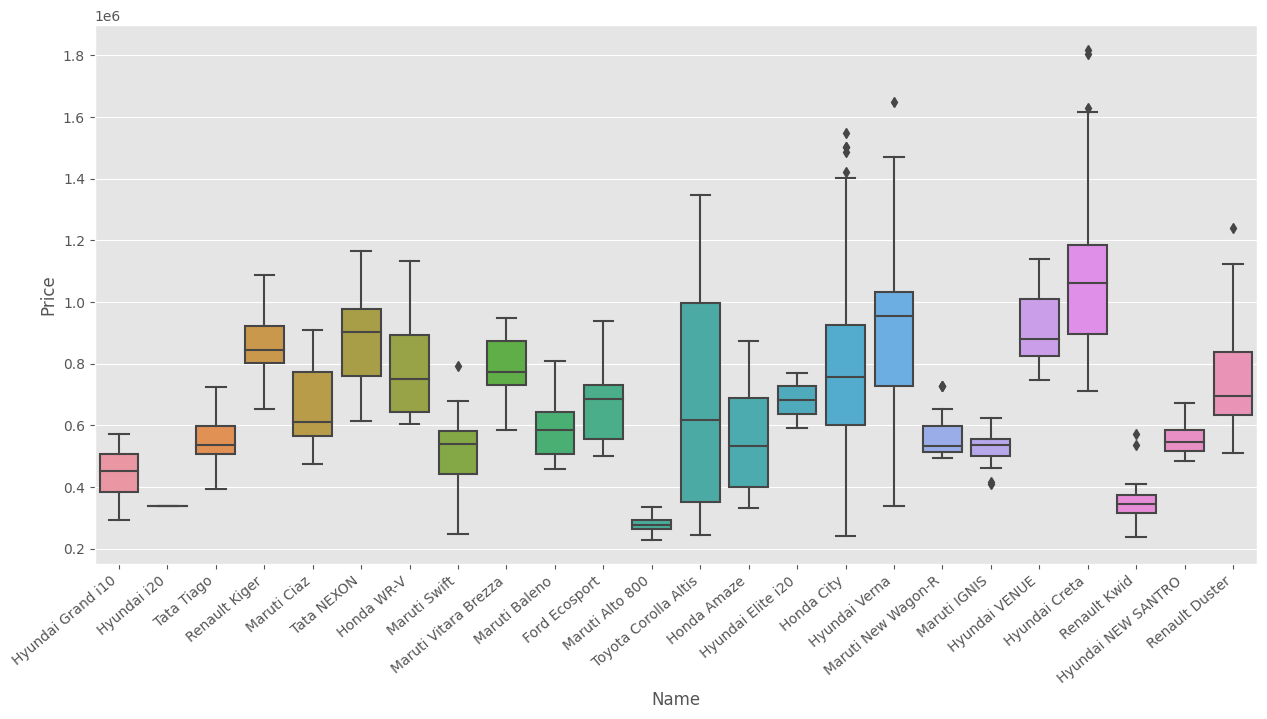

In [12]:
import seaborn as sns
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Name',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

<ipython-input-16-d5398e73d4e1>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


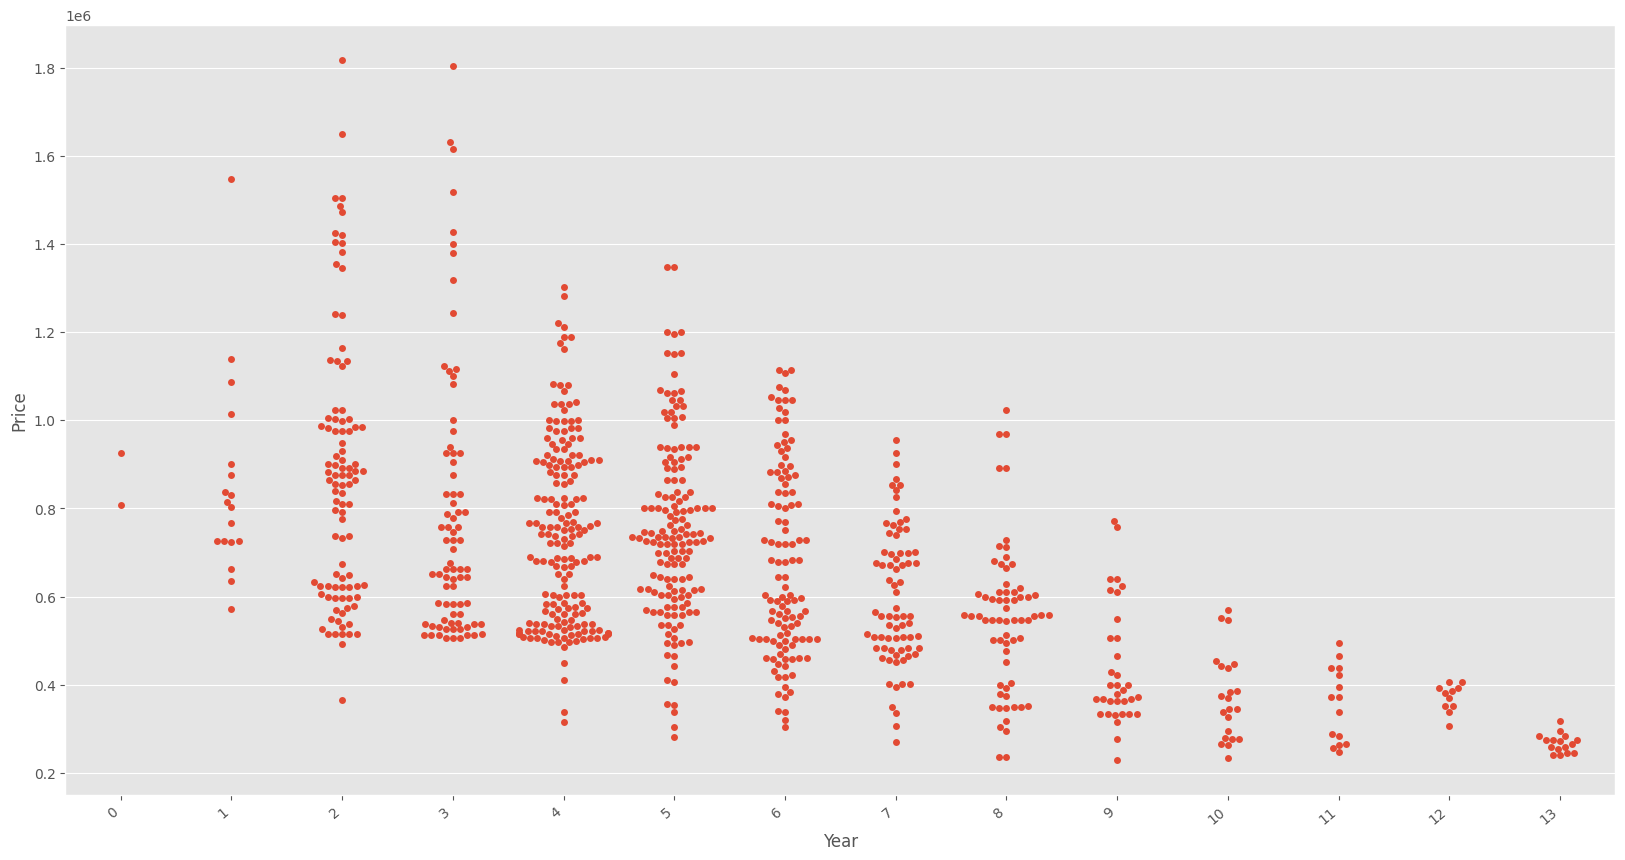

In [16]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

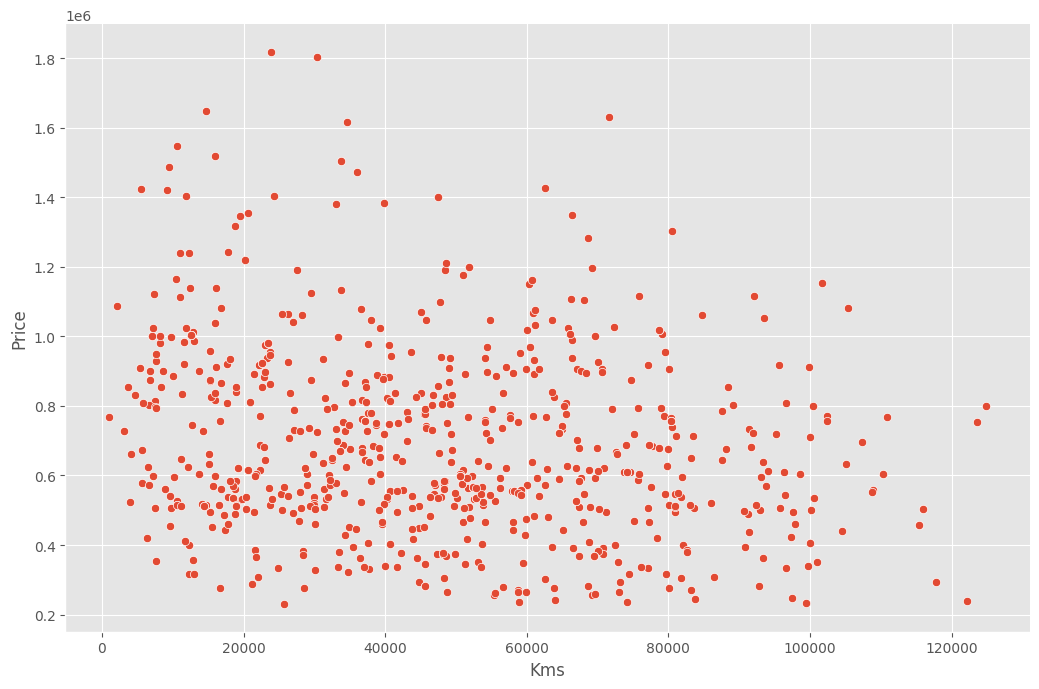

In [13]:
sns.relplot(x='Kms',y='Price',data=car,height=7,aspect=1.5)

<Axes: xlabel='Fuel', ylabel='Price'>

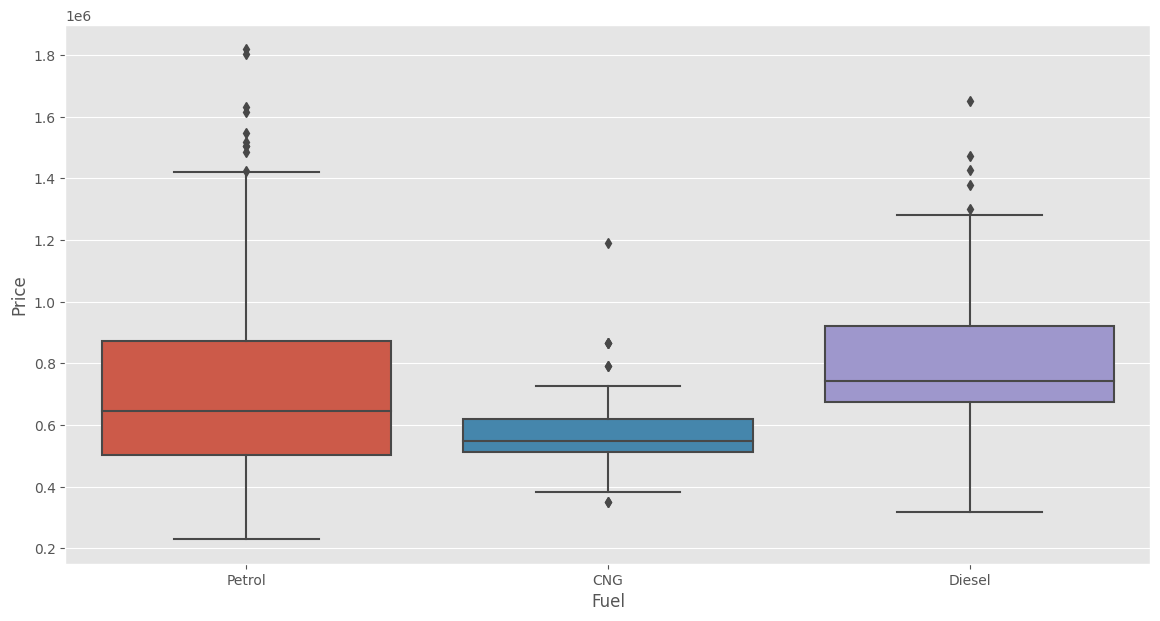

In [14]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel',y='Price',data=car)

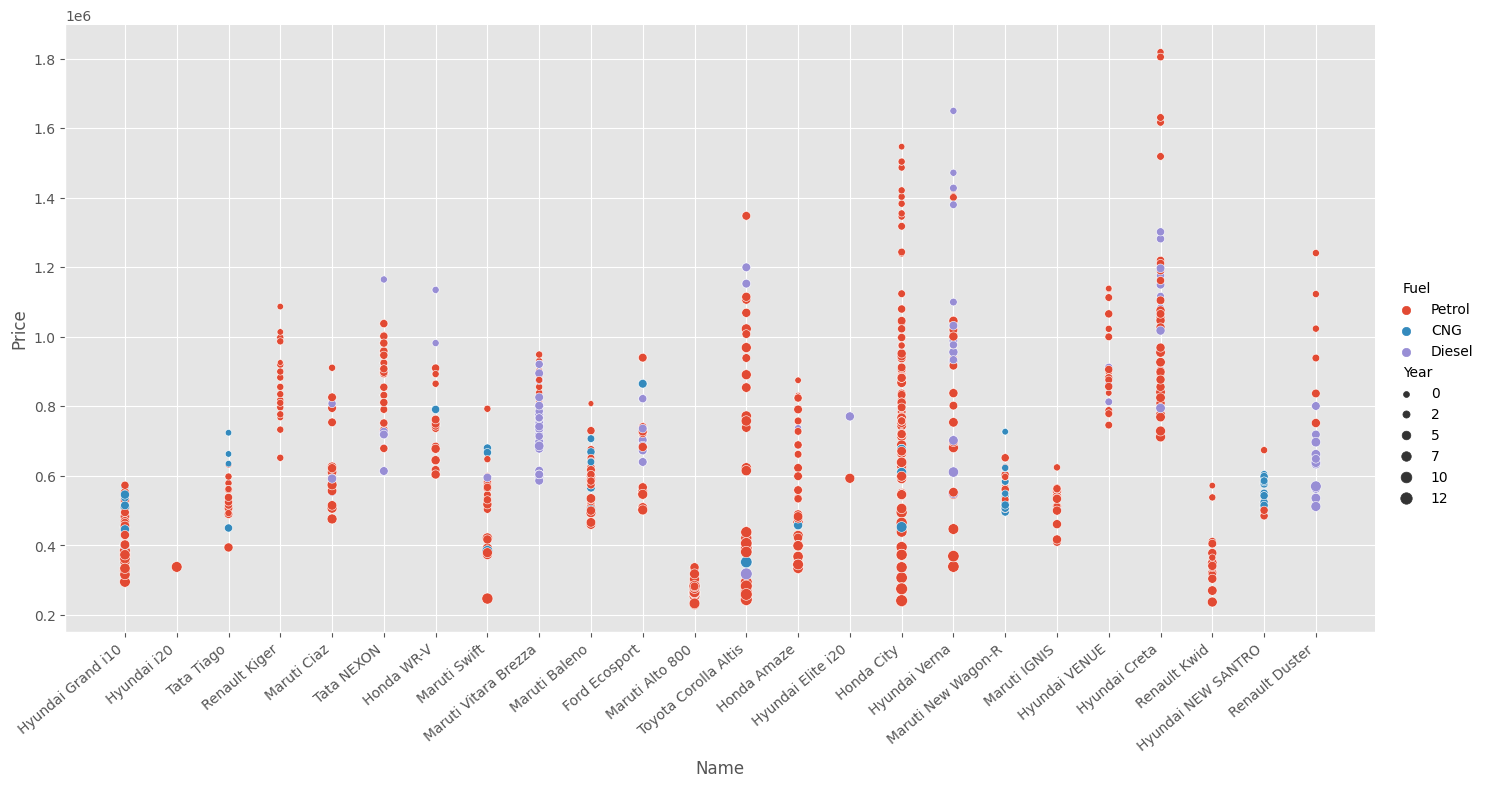

In [15]:
ax=sns.relplot(x='Name',y='Price',data=car,hue='Fuel',size='Year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [17]:
X=car[['Name','Year','Kms','Fuel','Type','Ownership','Model']]
y=car['Price']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
import lightgbm as lgb

In [20]:
from lightgbm import LGBMClassifier

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [22]:
ohe=OneHotEncoder()
ohe.fit(X[['Name','Fuel','Type','Model']])

OneHotEncoder()

In [23]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Fuel','Type','Model']),
                                    remainder='passthrough')

In [24]:
l = LGBMClassifier()


In [25]:
pipe=make_pipeline(column_trans,l)

In [27]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ford Ecosport', 'Honda Amaze', 'Honda City', 'Honda WR-V',
       'Hyundai Creta', 'Hyundai Elite i20', 'Hyundai Grand i10',
       'Hyundai NEW SANTRO', 'Hyundai VENUE', 'Hyundai Verna',
       'Hyundai i20', 'Maruti Alto 800', 'Maruti Baleno', 'Maruti Ciaz...
       'XZA + 1.2 PETROL A/T', 'XZA PETROL', 'XZA PLUS PETROL', 'ZDI',
       'ZDI + AMT', 'ZDI AMT', 'ZDI PLUS', 'ZDI PLUS AMT', 'ZETA 1.2',
       'ZETA 1.2 AMT', 'ZETA 1.2 AMT DUAL TONE',
       'ZETA 1.5 SHVS MT PETROL', 'ZETA CVT PETROL 1.2',
       'ZETA PETROL 1.2', 'ZX CVT', 'ZX CVT ANNIVERSARY EDITION', 'ZXI',
       'ZXI 1.2 AMT', 'ZXI AT', 'ZXI+', 'magna 1.2 crdi'], dtype=object)]),
                                                  ['Name', 'Fuel', 'Type',
                                                   'Model'])])),
                ('lgbmclassifier', LGBMClassifier())])

In [28]:
y_pred=pipe.predict(X_test)

In [29]:
r2_score(y_test,y_pred)

0.3140945082490899

In [30]:
pipe.fit(X_test,y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ford Ecosport', 'Honda Amaze', 'Honda City', 'Honda WR-V',
       'Hyundai Creta', 'Hyundai Elite i20', 'Hyundai Grand i10',
       'Hyundai NEW SANTRO', 'Hyundai VENUE', 'Hyundai Verna',
       'Hyundai i20', 'Maruti Alto 800', 'Maruti Baleno', 'Maruti Ciaz...
       'XZA + 1.2 PETROL A/T', 'XZA PETROL', 'XZA PLUS PETROL', 'ZDI',
       'ZDI + AMT', 'ZDI AMT', 'ZDI PLUS', 'ZDI PLUS AMT', 'ZETA 1.2',
       'ZETA 1.2 AMT', 'ZETA 1.2 AMT DUAL TONE',
       'ZETA 1.5 SHVS MT PETROL', 'ZETA CVT PETROL 1.2',
       'ZETA PETROL 1.2', 'ZX CVT', 'ZX CVT ANNIVERSARY EDITION', 'ZXI',
       'ZXI 1.2 AMT', 'ZXI AT', 'ZXI+', 'magna 1.2 crdi'], dtype=object)]),
                                                  ['Name', 'Fuel', 'Type',
                                                   'Model'])])),
                ('lgbmclassifier', LGBMClassifier())])

In [31]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ford Ecosport', 'Honda Amaze', 'Honda City', 'Honda WR-V',
       'Hyundai Creta', 'Hyundai Elite i20', 'Hyundai Grand i10',
       'Hyundai NEW SANTRO', 'Hyundai VENUE', 'Hyundai Verna',
       'Hyundai i20', 'Maruti Alto 800', 'Maruti Baleno', 'Maruti Ciaz...
       'XZA + 1.2 PETROL A/T', 'XZA PETROL', 'XZA PLUS PETROL', 'ZDI',
       'ZDI + AMT', 'ZDI AMT', 'ZDI PLUS', 'ZDI PLUS AMT', 'ZETA 1.2',
       'ZETA 1.2 AMT', 'ZETA 1.2 AMT DUAL TONE',
       'ZETA 1.5 SHVS MT PETROL', 'ZETA CVT PETROL 1.2',
       'ZETA PETROL 1.2', 'ZX CVT', 'ZX CVT ANNIVERSARY EDITION', 'ZXI',
       'ZXI 1.2 AMT', 'ZXI AT', 'ZXI+', 'magna 1.2 crdi'], dtype=object)]),
                                                  ['Name', 'Fuel', 'Type',
                                                   'Model'])])),
                ('lgbmclassifier', LGBMClassifier())])

In [32]:
pred = pipe.predict(X_test)
print(pred)
accuracy = pipe.score(X_test, y_test)
print(accuracy)

[ 502000 1066000  744000  496000  769000  567000  734000  547000  652000
  617000 1076000  639000  671000  264000  689000  368000  741000  547000
  507000  678000 1819000  507000  521000  662000  698000  597000 1115000
  822000  920000  982000  494000 1027000  956000  779000  998000  885000
  544000  561000  610000  893000  841000  598000  825000  791000  401000
  525000  793000  640000  503000  559000  557000  956000  536000  771000
  506000  752000  599000  747000  779000  752000  506000  940000  982000
  493000  499000  516000  504000  402000  940000  345000  766000  750000
 1153000  917000  507000 1027000 1240000  560000  906000  762000  295000
  985000  934000  854000 1000000  766000  363000  604000  381000  955000
  771000 1027000  808000  641000  540000  598000 1200000  593000  381000
 1080000  688000  589000  272000 1162000 1032000 1006000  401000  934000
  515000  516000  624000 1107000  728000  723000  746000  728000  383000
  512000  334000  649000  513000  882000  604000  5

In [33]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Swift',4,28956 ,'Petrol','Manual',1,'VXI']).reshape(1,7)))

array([572000])

In [34]:
import pickle

In [35]:
pickle.dump(pipe,open('LGBM.pkl','wb'))

In [37]:
pipe.predict(pd.DataFrame(columns=['Name','Year','Kms','Fuel','Type','Ownership','Model'],data=np.array(['Maruti Swift',2,28956 ,'Petrol','Manual',1,'VXI']).reshape(1,7)))

array([572000])